In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the files

In [3]:
df = pd.read_csv('bank_loan_data.csv')
df1 = df.copy()

# Extracting the first few rows

In [4]:
df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Number of Open Accounts,...,repaid_3rd_party,due_3rd_party,loans_held,first_repayment_date,last_repayment_date,agreement_signing_date,board_approval_date,effective_date_most_recent_,closed_date_most_recent_,last_disbursement_date
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,871112.0,2 years,Rent,Debt Consolidation,8391.73,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,99999999.0,Short Term,871112.0,2 years,Rent,Debt Consolidation,8391.73,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Watching the column names for better ideas

In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Loan Status', 'Loan_ID', 'Gender', 'Married', 'Dependents',
       'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'end_of_period', 'loan_number', 'region', 'country_code',
       'country', 'guarantor_country_code', 'guarantor', 'loan_type',
       'loan_status', 'interest_rate', 'currency_of_commitment', 'project_id',
       'project_name_', 'undisbursed_amount', 'disbursed_amount',
       'repaid_to_ibrd', 'due_to_ibrd', 'exchange_adjustment',
       'borrower_s_obligation', 'sold_3rd_party', 'repaid_3rd_party',
       'due_3rd_party', 'loans_held', 'first_repayment_date

# Finding the shape of the data

In [6]:
print('Total rows :', df.shape[0])
print('Total columns :', df.shape[0])

Total rows : 977614
Total columns : 977614


# Information of the data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977614 entries, 0 to 977613
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Current Loan Amount     977614 non-null  float64
 1   Term                    977614 non-null  object 
 2   Annual Income           977614 non-null  float64
 3   Home Ownership          977614 non-null  object 
 4   Purpose                 977614 non-null  object 
 5   Monthly Debt            977614 non-null  float64
 6   Current Credit Balance  977614 non-null  float64
 7   Gender                  977614 non-null  object 
 8   Married                 977614 non-null  object 
 9   Dependents              977614 non-null  object 
 10  Education               977614 non-null  object 
 11  Self_Employed           977614 non-null  object 
 12  ApplicantIncome         977614 non-null  float64
 13  CoapplicantIncome       977614 non-null  float64
 14  Credit_History      

# Finding out the null values

In [7]:
# Finding null values in every column
null_values = df.isnull().sum()

# Printing the null values for each column
print("Null values in each column:")
print(null_values)

Null values in each column:
Loan ID                        867614
Customer ID                    867614
Current Loan Amount            867614
Term                           867614
Annual Income                  888749
Years in current job           872263
Home Ownership                 867614
Purpose                        867614
Monthly Debt                   867614
Number of Open Accounts        867614
Number of Credit Problems      867614
Current Credit Balance         867614
Maximum Open Credit            867616
Bankruptcies                   867840
Loan Status                    877614
Loan_ID                        977000
Gender                         977013
Married                        977003
Dependents                     977015
Education                      977000
Self_Employed                  977032
ApplicantIncome                977000
CoapplicantIncome              977000
LoanAmount                     977022
Loan_Amount_Term               977014
Credit_History        

# Another way of calculating the basic info and null values of the data

In [8]:
def print_dataset_info(df):
    # Total number of rows and columns
    total_rows = df.shape[0]
    total_columns = df.shape[1]

    # Null values in each column
    null_values = df.isnull().sum()

    # Columns with all null values
    all_null_columns = null_values[null_values == total_rows].index.tolist()
    num_all_null_columns = len(all_null_columns)

    # Columns with most null values
    max_null_columns = null_values[null_values == null_values.max()].index.tolist()
    max_null_count = null_values.max()

    # Printing the information
    print("Total rows in the dataset:", total_rows)
    print("Total columns in the dataset:", total_columns)
    print("Columns with all null values:", num_all_null_columns)
    if num_all_null_columns > 0:
        print("Columns with all null values:", all_null_columns)
    print("Columns with the most null values (Count:", max_null_count, "):", max_null_columns)

# Usage example:
print_dataset_info(df)

Total rows in the dataset: 977614
Total columns in the dataset: 58
Columns with all null values: 2
Columns with all null values: ['currency_of_commitment', 'last_disbursement_date']
Columns with the most null values (Count: 977614 ): ['currency_of_commitment', 'last_disbursement_date']


# Percentage of null values in all columns

In [9]:
null_percentage = df.isnull().mean()
print(null_percentage)

Loan ID                        0.887481
Customer ID                    0.887481
Current Loan Amount            0.887481
Term                           0.887481
Annual Income                  0.909100
Years in current job           0.892237
Home Ownership                 0.887481
Purpose                        0.887481
Monthly Debt                   0.887481
Number of Open Accounts        0.887481
Number of Credit Problems      0.887481
Current Credit Balance         0.887481
Maximum Open Credit            0.887483
Bankruptcies                   0.887712
Loan Status                    0.897710
Loan_ID                        0.999372
Gender                         0.999385
Married                        0.999375
Dependents                     0.999387
Education                      0.999372
Self_Employed                  0.999405
ApplicantIncome                0.999372
CoapplicantIncome              0.999372
LoanAmount                     0.999394
Loan_Amount_Term               0.999386


# Unimportant columns to be deleted 

In [10]:
def delete_columns(df, column_to_delete):
    df.drop(columns=column_to_delete, inplace=True)

# Assuming your DataFrame is named 'df'
columns_to_drop = ['Years in current job', 'Number of Open Accounts', 'loan_type', 'loan_status', 
                   'Number of Credit Problems', 'Bankruptcies', 
                   'Maximum Open Credit', 'board_approval_date', 'Loan Status', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area',
                   'country_code', 'guarantor_country_code', 'guarantor', 'currency_of_commitment', 'project_id', 'project_name_',
                   'repaid_to_ibrd', 'exchange_adjustment', 'borrower_s_obligation', 'sold_3rd_party', 'repaid_3rd_party', 'due_3rd_party',
                   'loans_held', 'effective_date_most_recent_', 'closed_date_most_recent_',
                   'Loan ID', 'Customer ID','end_of_period','loan_number', 'due_to_ibrd', 'last_disbursement_date']

delete_columns(df, columns_to_drop)


# Watching the remaining columns

In [11]:
df.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Loan_ID',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Loan_Status',
       'region', 'country', 'interest_rate', 'undisbursed_amount',
       'disbursed_amount', 'first_repayment_date', 'last_repayment_date',
       'agreement_signing_date'],
      dtype='object')

# WORKING WITH OUTLIERS

# VISUALIZING THE DATA THAT IF THEY ARE NORMALLY DISTRIBUTED OR NOT

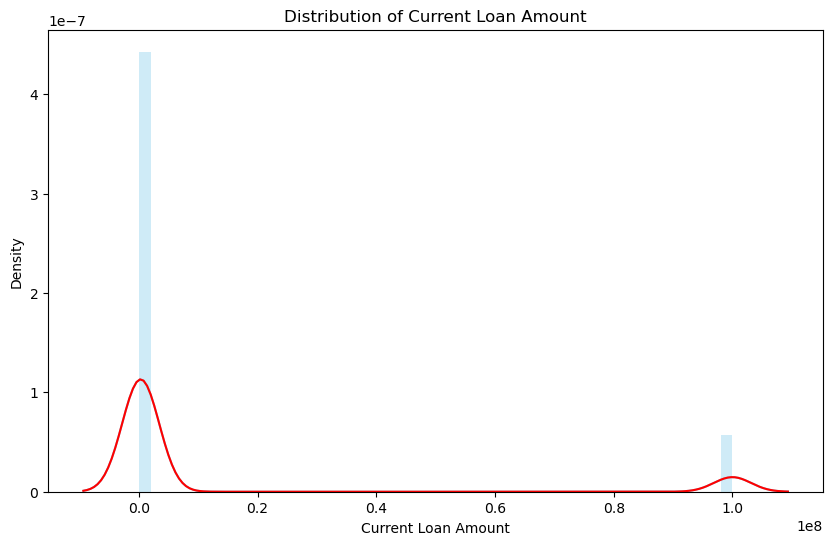

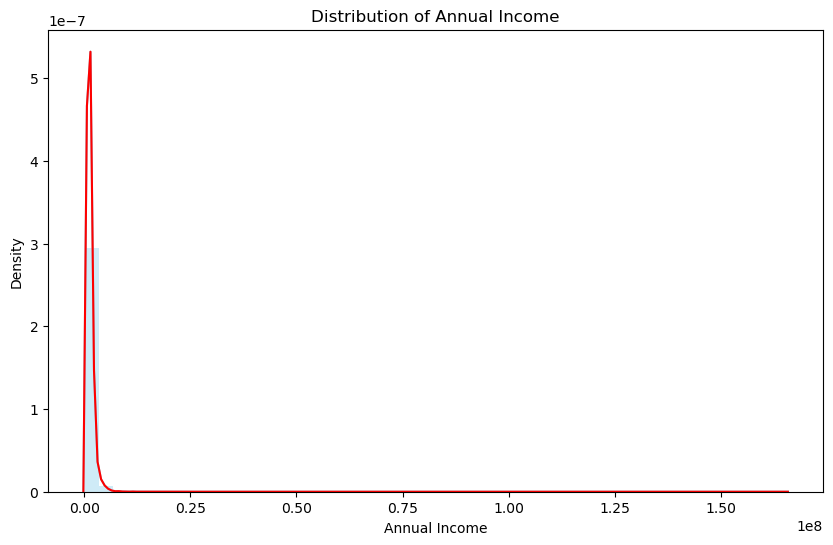

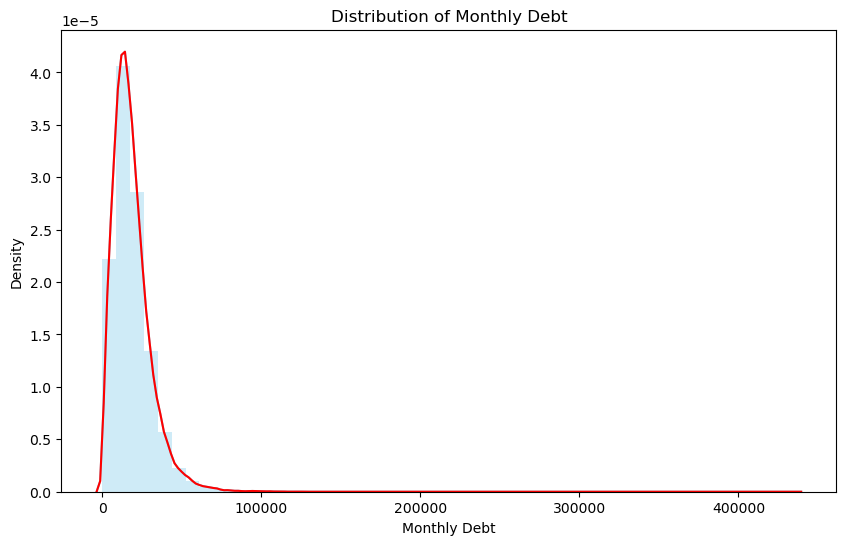

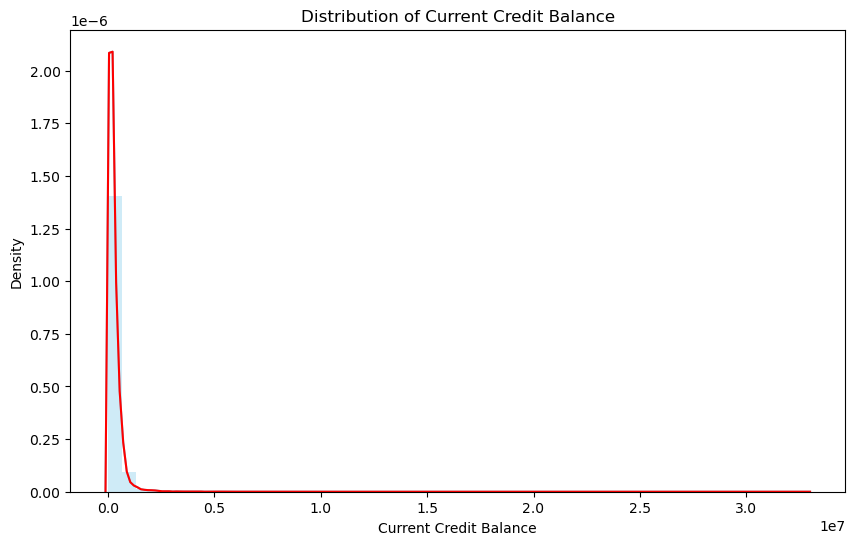

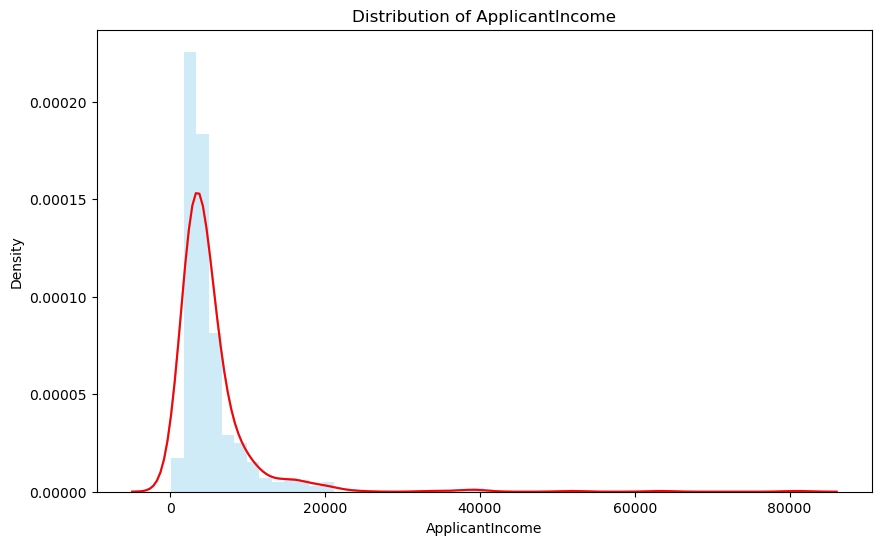

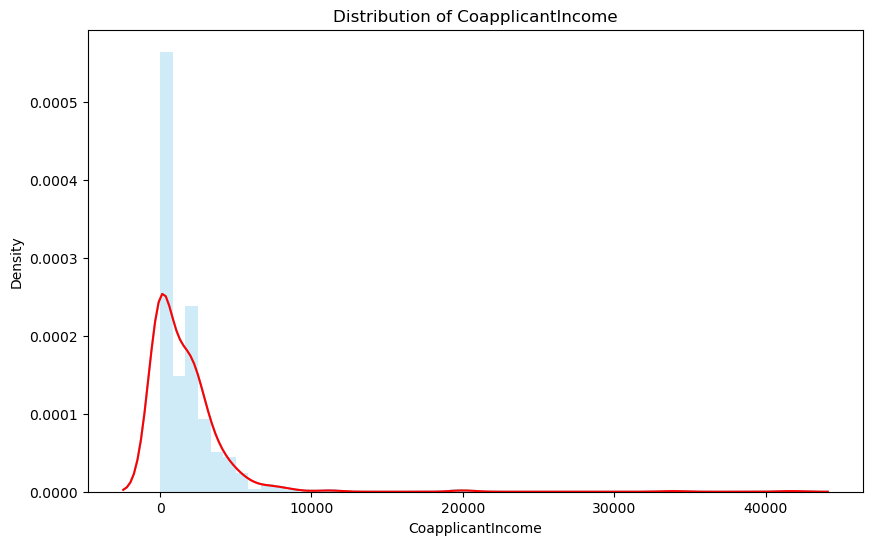

In [13]:
def visualize_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10,6))
        sns.distplot(df[column], kde=True, color='skyblue')
        sns.kdeplot(df[column], color='red')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()
        
columns_of_interest = ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 
                       'Current Credit Balance', 'ApplicantIncome', 'CoapplicantIncome']
visualize_outliers(df, columns_of_interest)

# Calculating Outliers 

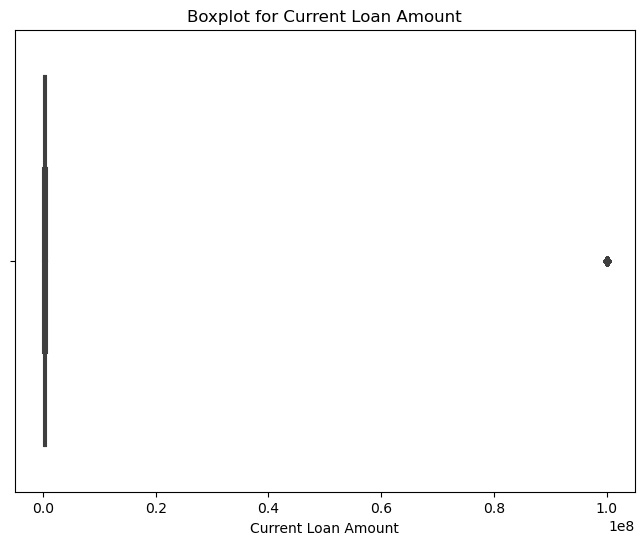

Outliers in Current Loan Amount:
3         99999999.0
24        99999999.0
25        99999999.0
28        99999999.0
81        99999999.0
             ...    
976959    99999999.0
976978    99999999.0
976995    99999999.0
976996    99999999.0
976999    99999999.0
Name: Current Loan Amount, Length: 12617, dtype: float64
--------------------------------------------------


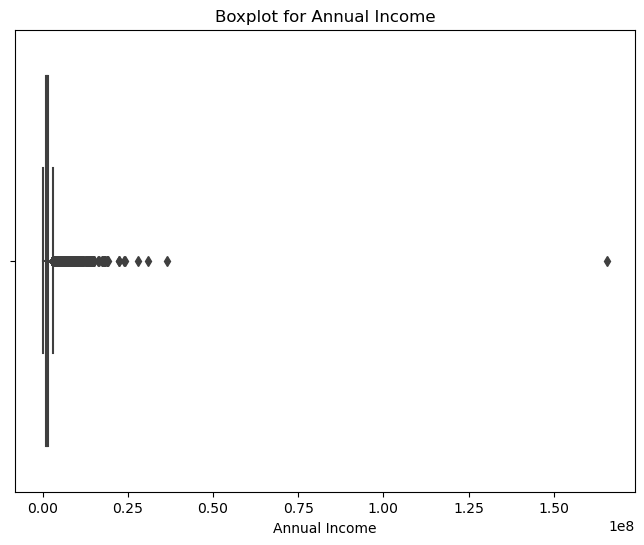

Outliers in Annual Income:
43        5951484.0
73        4872778.0
98        3503106.0
99        3783660.0
105       5048110.0
            ...    
976902    8152729.0
976922    3250026.0
976943    3839520.0
976959    3553323.0
976989    3838380.0
Name: Annual Income, Length: 4158, dtype: float64
--------------------------------------------------


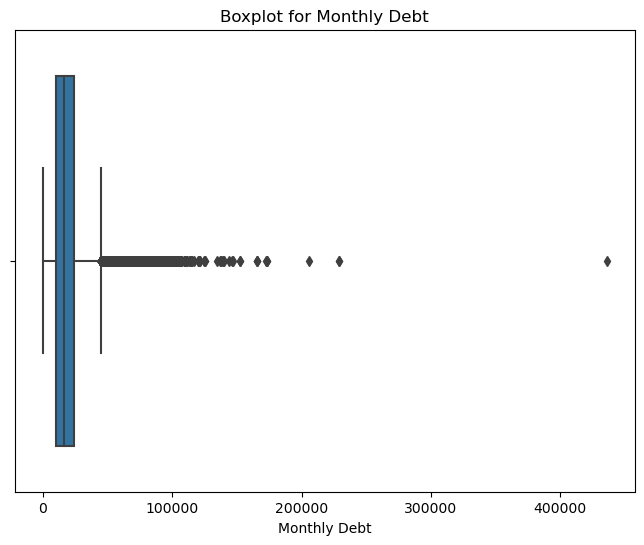

Outliers in Monthly Debt:
43        61498.63
71        45666.12
101       46469.82
104       50060.44
105       50060.44
            ...   
976930    46417.00
976935    47260.03
976943    61112.36
976989    48939.44
976992    51648.08
Name: Monthly Debt, Length: 3733, dtype: float64
--------------------------------------------------


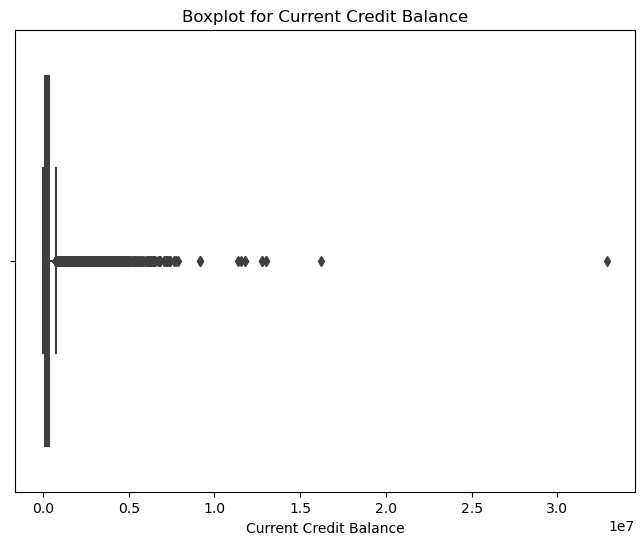

Outliers in Current Credit Balance:
34         827051.0
101       1137036.0
127        763857.0
128        786942.0
129        786942.0
            ...    
976912     788614.0
976959     988874.0
976984    2163891.0
976990     804175.0
976991     850820.0
Name: Current Credit Balance, Length: 5703, dtype: float64
--------------------------------------------------


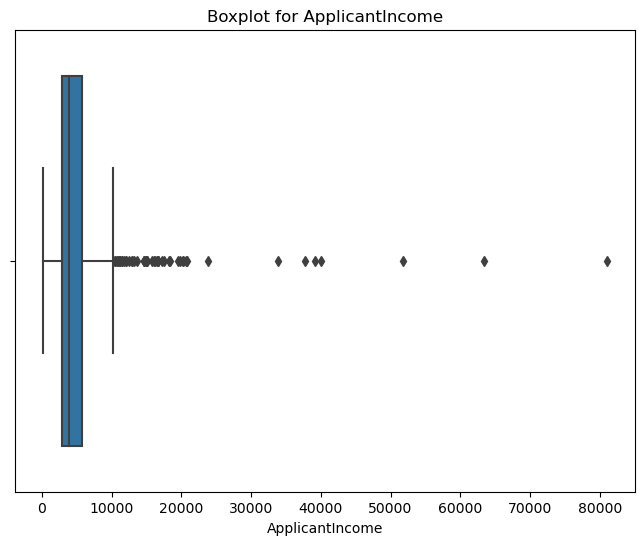

Outliers in ApplicantIncome:
977009    12841.0
977034    12500.0
977054    11500.0
977067    10750.0
977102    13650.0
977106    11417.0
977115    14583.0
977119    10408.0
977126    23803.0
977128    10513.0
977130    20166.0
977138    14999.0
977144    11757.0
977146    14866.0
977155    39999.0
977171    51763.0
977183    33846.0
977185    39147.0
977191    12000.0
977199    11000.0
977254    16250.0
977258    14683.0
977271    11146.0
977278    14583.0
977284    20667.0
977308    20233.0
977324    15000.0
977333    63337.0
977369    19730.0
977370    15759.0
977409    81000.0
977424    14880.0
977432    12876.0
977438    10416.0
977443    37719.0
977467    16692.0
977475    16525.0
977478    16667.0
977483    10833.0
977487    18333.0
977493    17263.0
977506    20833.0
977509    13262.0
977525    17500.0
977533    11250.0
977534    18165.0
977561    19484.0
977572    16666.0
977594    16120.0
977604    12000.0
Name: ApplicantIncome, dtype: float64
---------------------------------

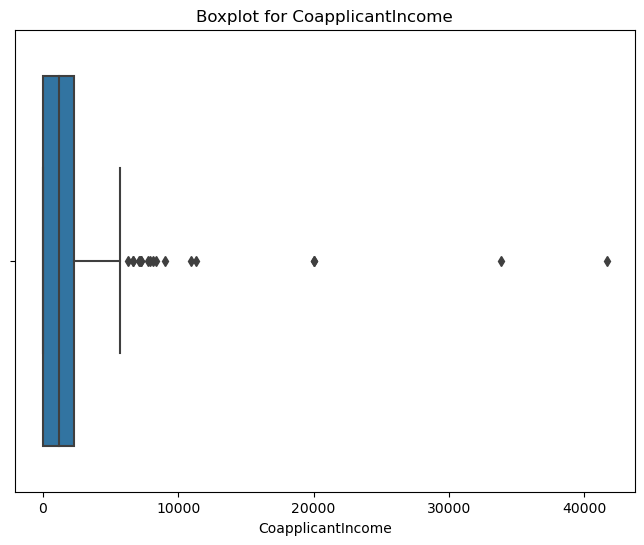

Outliers in CoapplicantIncome:
977009    10968.0
977012     8106.0
977038     7210.0
977122     8980.0
977135     7750.0
977177    11300.0
977180     7250.0
977253     7101.0
977349     6250.0
977372     7873.0
977402    20000.0
977417    20000.0
977444     8333.0
977506     6667.0
977513     6666.0
977523     7166.0
977581    33837.0
977600    41667.0
Name: CoapplicantIncome, dtype: float64
--------------------------------------------------


In [15]:
def detect_outliers_and_visualize(df, columns):
    # Iterate over each column
    for column in columns:
        if df[column].dtype != 'object':  # Check if the column is numeric
            # Calculate first and third quartiles
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            # Interquartile range
            iqr = q3 - q1
            # Outlier step
            outlier_step = 1.5 * iqr
            # Determine outliers
            outliers = df[(df[column] < q1 - outlier_step) | (df[column] > q3 + outlier_step)][column]
            
            # Create boxplot
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot for {column}')
            plt.show()
            
            # Print outliers
            if len(outliers) > 0:
                print(f"Outliers in {column}:")
                print(outliers)
            else:
                print(f"No outliers found in {column}")
            print("-" * 50)

# Example usage:
detect_outliers_and_visualize(df, ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'ApplicantIncome', 'CoapplicantIncome'])


# Performing the trimming technique to handle outliers

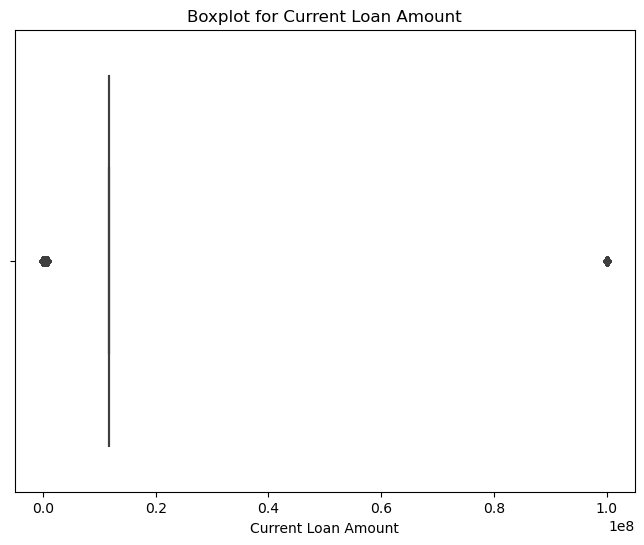

Outliers in Current Loan Amount:
0           611314.0
1           266662.0
2           153494.0
3         99999999.0
4           176242.0
             ...    
976995    99999999.0
976996    99999999.0
976997      103136.0
976998      530332.0
976999    99999999.0
Name: Current Loan Amount, Length: 110000, dtype: float64
--------------------------------------------------


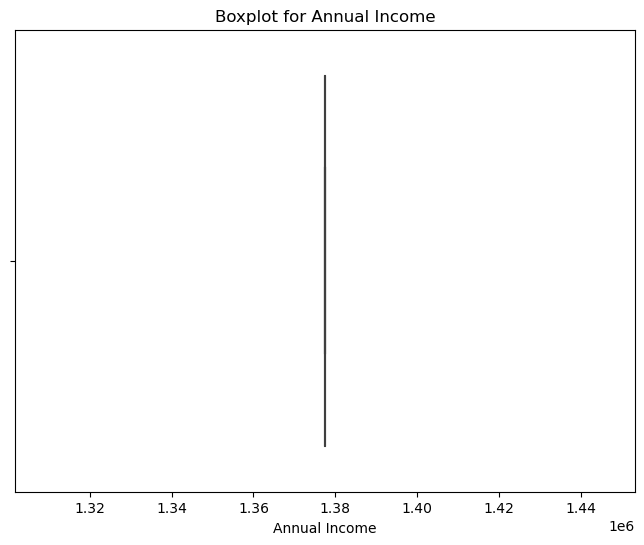

No outliers found in Annual Income
--------------------------------------------------


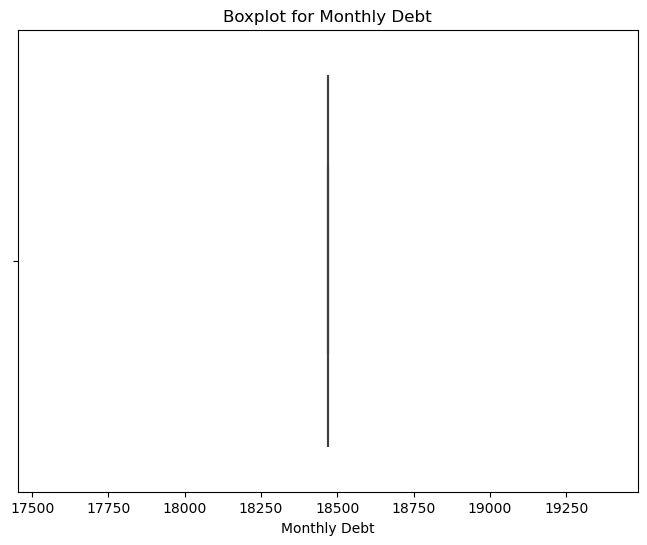

No outliers found in Monthly Debt
--------------------------------------------------


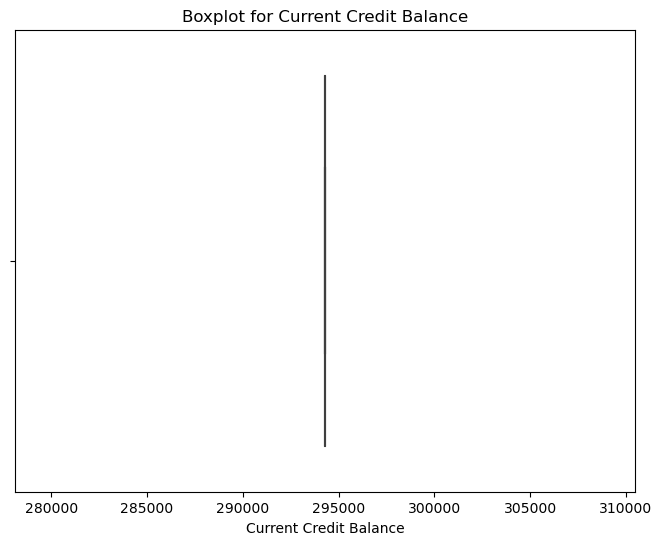

No outliers found in Current Credit Balance
--------------------------------------------------


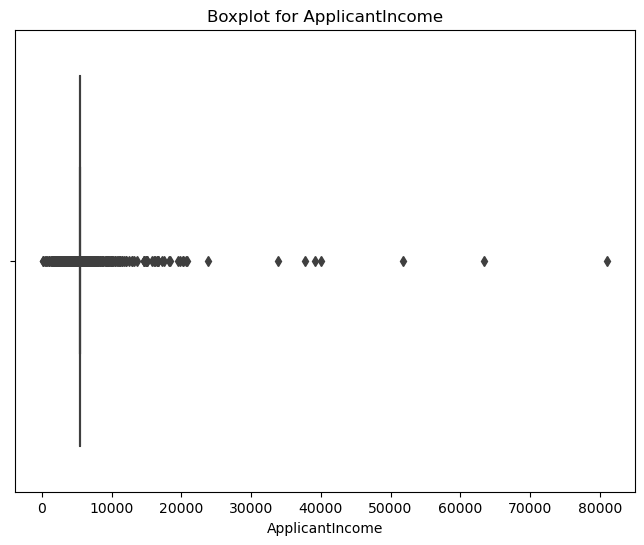

Outliers in ApplicantIncome:
977000    5849.0
977001    4583.0
977002    3000.0
977003    2583.0
977004    6000.0
           ...  
977609    2900.0
977610    4106.0
977611    8072.0
977612    7583.0
977613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64
--------------------------------------------------


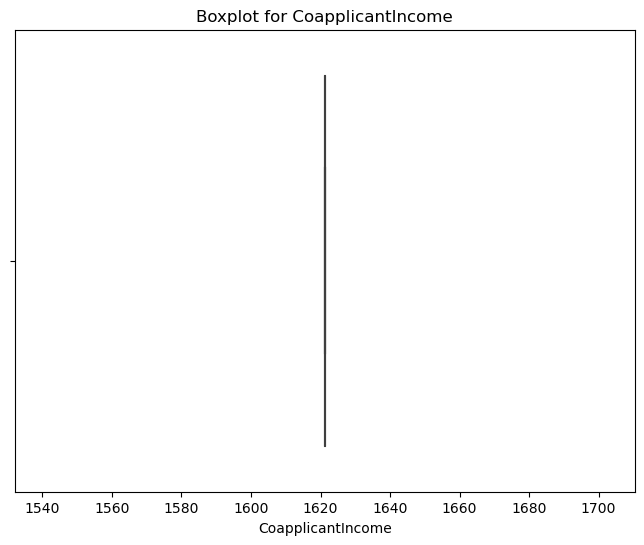

No outliers found in CoapplicantIncome
--------------------------------------------------


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers_and_visualize(df, columns):
    # Make a copy of the DataFrame
    df_copy = df.copy()
    
    # Iterate over each column
    for column in columns:
        if df_copy[column].dtype != 'object':  # Check if the column is numeric
            # Calculate first and third quartiles
            q1 = df_copy[column].quantile(0.25)
            q3 = df_copy[column].quantile(0.75)
            # Interquartile range
            iqr = q3 - q1
            # Outlier step
            outlier_step = 1.5 * iqr
            # Determine outliers
            outliers = df_copy[(df_copy[column] < q1 - outlier_step) | (df_copy[column] > q3 + outlier_step)][column]
            
            # Create boxplot
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=df_copy[column])
            plt.title(f'Boxplot for {column}')
            plt.show()
            
            # Trim outliers
            df_copy = df_copy[(df_copy[column] >= q1 - outlier_step) & (df_copy[column] <= q3 + outlier_step)]
            
            # Print outliers
            if len(outliers) > 0:
                print(f"Outliers in {column}:")
                print(outliers)
            else:
                print(f"No outliers found in {column}")
            print("-" * 50)
    
    return df_copy  # Return trimmed DataFrame

# Example usage:
trimmed_df = detect_outliers_and_visualize(df, ['Current Loan Amount', 'Annual Income', 'Monthly Debt', 'Current Credit Balance', 'ApplicantIncome', 'CoapplicantIncome'])

Current loan amount, applicant income are left with outliers still after performing trimming

# Fetching the dates column

In [17]:
def extract_date_features(df, date_columns):
    for column in date_columns:
        # Convert the column to datetime if it's not already
        df[column] = pd.to_datetime(df[column])
        
        # Extract year, month, week, and day
        df[column + '_year'] = df[column].dt.year
        df[column + '_month'] = df[column].dt.month
        df[column + '_week'] = df[column].dt.isocalendar().week
        df[column + '_day'] = df[column].dt.day
        
    return df

# Example usage:
date_columns = ['first_repayment_date', 'last_repayment_date', 'agreement_signing_date']
df = extract_date_features(df, date_columns)

In [18]:
df.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Loan_ID',
       'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Loan_Status',
       'region', 'country', 'interest_rate', 'undisbursed_amount',
       'disbursed_amount', 'first_repayment_date', 'last_repayment_date',
       'agreement_signing_date', 'first_repayment_date_year',
       'first_repayment_date_month', 'first_repayment_date_week',
       'first_repayment_date_day', 'last_repayment_date_year',
       'last_repayment_date_month', 'last_repayment_date_week',
       'last_repayment_date_day', 'agreement_signing_date_year',
       'agreement_signing_date_month', 'agreement_signing_date_week',
       'agreement_signing_date_day'],
      dtype='object')

In [19]:
df.iloc[:10,21:]

,disbursed_amount,first_repayment_date,last_repayment_date,agreement_signing_date,first_repayment_date_year,first_repayment_date_month,first_repayment_date_week,first_repayment_date_day,last_repayment_date_year,last_repayment_date_month,last_repayment_date_week,last_repayment_date_day,agreement_signing_date_year,agreement_signing_date_month,agreement_signing_date_week,agreement_signing_date_day
0,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
1,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
2,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
3,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
4,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
5,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
6,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
7,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
8,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN
9,NaN,NaT,NaT,NaT,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN


# The columns after breaking down the dates column into week, month, year, and day.

In [21]:
for col in df.columns:
    print(col)

Current Loan Amount
Term
Annual Income
Home Ownership
Purpose
Monthly Debt
Current Credit Balance
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
Credit_History
Loan_Status
region
country
interest_rate
undisbursed_amount
disbursed_amount
first_repayment_date
last_repayment_date
agreement_signing_date
first_repayment_date_year
first_repayment_date_month
first_repayment_date_week
first_repayment_date_day
last_repayment_date_year
last_repayment_date_month
last_repayment_date_week
last_repayment_date_day
agreement_signing_date_year
agreement_signing_date_month
agreement_signing_date_week
agreement_signing_date_day


# Checking the unique values of country

In [22]:
df['country'].unique()

array([nan, 'France', 'Netherlands', 'Denmark', 'Luxembourg', 'Chile'],
      dtype=object)

# dropping the dates column in order to build a model.

In [23]:
df.drop(columns=['Loan_ID', 'undisbursed_amount', 'disbursed_amount', 
                'first_repayment_date', 'last_repayment_date', 'agreement_signing_date',
                'first_repayment_date_year', 'first_repayment_date_month','first_repayment_date_week',
                'first_repayment_date_day', 'last_repayment_date_year', 'last_repayment_date_month',
                'last_repayment_date_week', 'last_repayment_date_day', 'agreement_signing_date_year',
                'agreement_signing_date_month', 'agreement_signing_date_week', 'agreement_signing_date_day'], inplace=True)


# Remaining columns

In [24]:
df.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Gender',
       'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Loan_Status',
       'region', 'country', 'interest_rate'],
      dtype='object')

# Again watching the null values

In [25]:
df.isnull().sum()

Current Loan Amount       867614
Term                      867614
Annual Income             888749
Home Ownership            867614
Purpose                   867614
Monthly Debt              867614
Current Credit Balance    867614
Gender                    977013
Married                   977003
Dependents                977015
Education                 977000
Self_Employed             977032
ApplicantIncome           977000
CoapplicantIncome         977000
Credit_History                 0
Loan_Status               977000
region                    110614
country                   110614
interest_rate             116683
dtype: int64

# Creating function to handle missing values in all the columns

In [29]:
import pandas as pd

# Define the function to fill missing values
def fill_missing_values(df):
    # Fill missing values in numerical columns with mean
    numerical_columns = df.select_dtypes(include=['number']).columns
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    
    # Fill missing values in categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
    
    return df

# Assuming your DataFrame is named 'data'
df = fill_missing_values(df)


# Watching the null values

No null values are there in the column. The null values have been handled properly.

In [30]:
df.isnull().sum()

Current Loan Amount       0
Term                      0
Annual Income             0
Home Ownership            0
Purpose                   0
Monthly Debt              0
Current Credit Balance    0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
Credit_History            0
Loan_Status               0
region                    0
country                   0
interest_rate             0
dtype: int64

# Building the pipeline by using column transformer.

Here we have used Column Transformer in order to encode the categorical values, scaling the numerical values, and imputing the unformatted, missing values if still left.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression


# Define the column transformer
numeric_features = ['Annual Income', 'Monthly Debt', 'Current Credit Balance']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Term', 'Home Ownership', 'Purpose', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       ]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('fill_missing', FunctionTransformer(fill_missing_values)),
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Splitting the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features excluding 'disbursed_amount', 'undisbursed_amount', and date columns


X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns in X train.

In [33]:
X_train.columns

Index(['Current Loan Amount', 'Term', 'Annual Income', 'Home Ownership',
       'Purpose', 'Monthly Debt', 'Current Credit Balance', 'Gender',
       'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'region',
       'country', 'interest_rate'],
      dtype='object')

# Fitting the pipeline on training and testing data.

In [34]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9997698480485672


# Predicting the values of Loan Status, and also watching the accuracy of the model.

In [35]:
from sklearn.metrics import accuracy_score

# Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the predicted values
print("Predicted values:", y_pred)

Accuracy: 0.9997698480485672
Predicted values: ['Y' 'Y' 'Y' ... 'Y' 'Y' 'Y']


# Evaluation of Model by using Confusion Matrix.

In [37]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the true labels and y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[     4     37]
 [     8 195474]]


# Visualizing the results of Confusion Matrix.

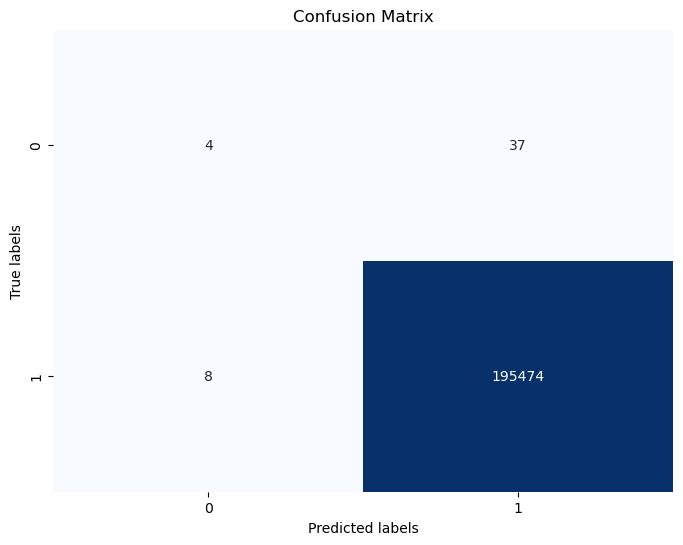

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Calculating the errors in the data 

In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

# import numpy as np

# Convert 'Y' and 'N' to numerical values in y_test and y_pred
y_test_numeric = np.where(y_test == 'Y', 1, 0)
y_pred_numeric = np.where(y_pred == 'Y', 1, 0)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.00023015195143282375
Root Mean Squared Error (RMSE): 0.015170759751338221


# Dumping the pipeline by using pickle, so that it can be integrated in the website.

In [40]:
import pickle

pickle.dump(pipeline,open('model.pkl', 'wb'))

# END OF THE PROJECT